In [5]:
import pandas as pd

ecom_data = pd.read_csv(r"D:\Ecom-data-analysis\data\online_retail.csv")

print(ecom_data.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
ecom = ecom_data.dropna(subset=["Description"])

ecom_customers= ecom.copy()
ecom_customers["Revenue"] = ecom_customers["Quantity"]*ecom_customers["UnitPrice"]

sales = ecom_customers[ (ecom_customers["Quantity"] > 0) & (ecom_customers["UnitPrice"]>0) &(~ecom_customers["InvoiceNo"].str.startswith("C"))].copy()
returns = ecom[ (ecom["Quantity"] < 0) | (ecom["UnitPrice"]<0) | (ecom["InvoiceNo"].str.startswith("C")) ].copy()


sales["InvoiceDate"]= pd.to_datetime(sales["InvoiceDate"])
sales["Month"] = sales["InvoiceDate"].dt.to_period("M")
sales.head()








,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


,Month,Revenue
0,2010-12,823746.140
1,2011-01,691364.560
2,2011-02,523631.890
3,2011-03,717639.360
4,2011-04,537808.621
5,2011-05,770536.020
6,2011-06,761739.900
7,2011-07,719221.191
8,2011-08,759138.380
9,2011-09,1058590.172


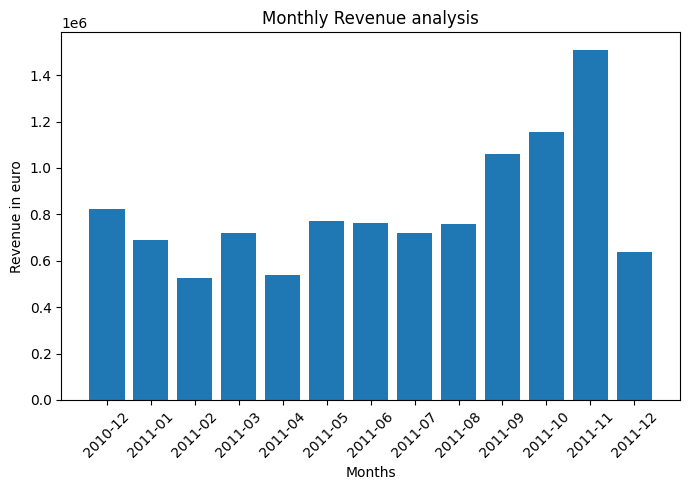

In [7]:
#monthly analysis
monthly_orders = sales.groupby("Month")["Revenue"].sum().reset_index(name="Revenue")

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.bar(monthly_orders["Month"].astype(str), monthly_orders["Revenue"])
plt.title("Monthly Revenue analysis")
plt.xlabel("Months")
plt.ylabel("Revenue in euro")
plt.xticks(rotation=45)
plt.tight_layout()

monthly_orders.head(10)

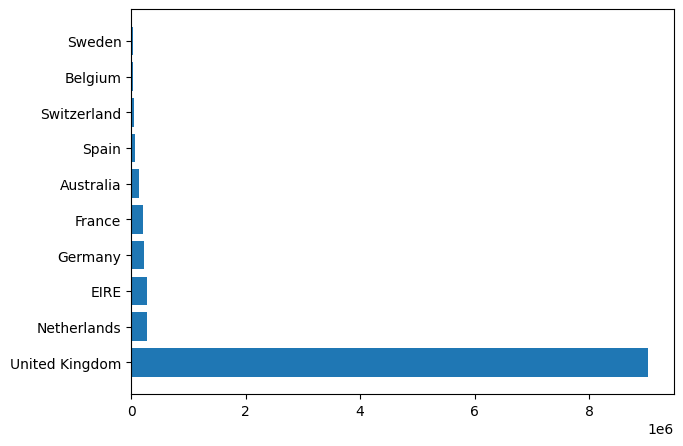

In [8]:
# top 10 country wise analysis

country_wise = sales.groupby("Country")["Revenue"].sum().sort_values(ascending=False).reset_index()
country=country_wise.head(10).Country.to_numpy()
revi = country_wise.head(10).Revenue.astype(int).to_numpy()
plt.figure(figsize=(7,5))
plt.barh(country, revi)
plt.show()

[9025222  285446  283453  228867  209715]


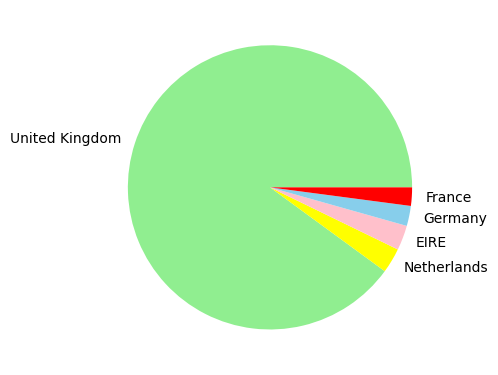

In [9]:
# top 5 country wose analysis

country_wise = sales.groupby("Country")["Revenue"].sum().sort_values(ascending=False).reset_index()

colors = ['lightgreen', 'yellow', 'pink', 'skyblue', "red", "grey"]
country=country_wise.head(5).Country.to_numpy()
pi = country_wise.head(5).Revenue.astype(int).to_numpy()
print(pi)
plt.figure(figsize=(5,5))
plt.pie(pi, colors=colors, labels=country)
plt.tight_layout()
plt.show()

In [16]:
sales["Revenue_M"] = country_wise["Revenue"]/1000000
#e=wityrfjy


In [11]:
# top customers

top_customers = sales.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).reset_index(name="Revenue")
t10=top_customers.head(10).copy()

# top customer preferences

top_ids=t10["CustomerID"]

top_sales = sales[sales["CustomerID"].isin(top_ids)]
top_sales.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Revenue_M
175,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029.0,United Kingdom,178.20,2010-12,NaN
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom,165.00,2010-12,NaN
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom,165.00,2010-12,NaN
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom,733.44,2010-12,NaN
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,647.04,2010-12,NaN


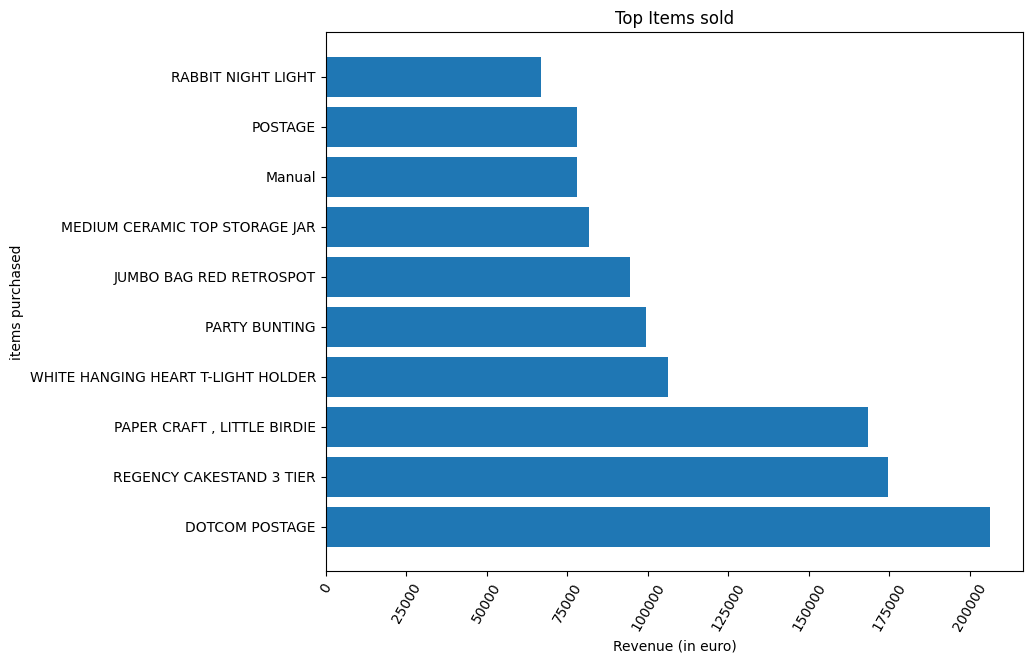

In [12]:
# most sold items:

top_items= sales.groupby("Description")["Revenue"].sum().sort_values(ascending=False).reset_index()
top10it=top_items.head(10)

plt.figure(figsize=(9,7))
plt.barh(top10it["Description"], top10it["Revenue"])
plt.xlabel("Revenue (in euro)")
plt.ylabel("items purchased")
plt.xticks(rotation=60)
plt.title("Top Items sold")
plt.show()

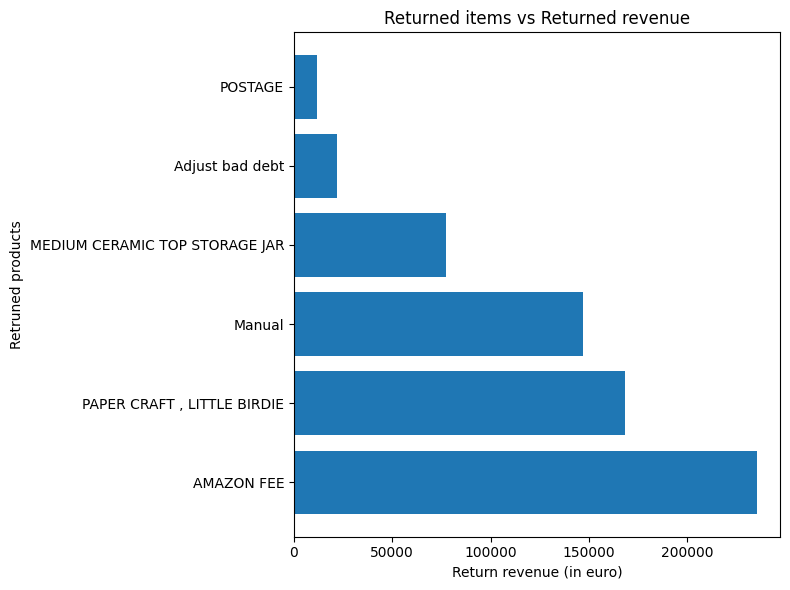

In [13]:
# return anakysis...
returns["Revenue"] = returns["Quantity"]* returns["UnitPrice"]
returns["Revenue"] = returns["Revenue"].abs()
returned_products = returns.groupby("Description")["Revenue"].sum().sort_values(ascending=False).reset_index().head(6)
returned_products

plt.figure(figsize=(8,6))
plt.barh(returned_products["Description"], returned_products["Revenue"])
plt.ylabel("Retruned products")
plt.xlabel("Return revenue (in euro)")
plt.title("Returned items vs Returned revenue")
plt.tight_layout()
plt.show()

In [14]:
# KPI (Key performance index)

Total_orders = sales["InvoiceNo"].nunique()
Total_customers = sales["CustomerID"].nunique()
Total_revenue = sales["Revenue"].sum()
total_return_revenue = returns["Revenue"].sum()
average_order_value = Total_revenue/Total_orders
return_rate = total_return_revenue/Total_revenue

print("===== KEY PERFORMANCE INDICES =====")
print(f"Total Orders: {Total_orders}")
print(f"Total customers: {Total_customers}")
print(f"Total revenue: {Total_revenue}")
print(f"Total return revenue: {total_return_revenue}")
print(f"Average order value: {average_order_value}")
print(f"Return rate: {return_rate}")

===== KEY PERFORMANCE INDICES =====
Total Orders: 19960
Total customers: 4338
Total revenue: 10666684.544
Total return revenue: 918936.6100000001
Average order value: 534.403033266533
Return rate: 0.08615016279982717


In [15]:
sales.to_csv("sales_cleaned_dataset", index=False)
returns.to_csv("Returns_dataset", index=False)